<a href="https://colab.research.google.com/github/vamc777/Coursera_Capstone/blob/main/Vamshi_NLM2_%E2%80%94_NLM2_TASK_2_SENTIMENT_ANALYSIS_USING_NEURAL_NETWORKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Amazon review dataset
amazon_df = pd.read_csv('/content/amazon_cells_labelled.txt', sep='\t',header=None)
column_name = ['Amazon_Review', 'Sentiment']
amazon_df.columns = column_name
amazon_df

,Amazon_Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [ ]:
#IMDB review dataset
imdb_df = pd.read_csv('/content/imdb_labelled.txt', sep='\t',header=None)
column_name = ['IMDB_Review', 'Sentiment']
imdb_df.columns = column_name
imdb_df

,IMDB_Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [ ]:
#Yelp review dataset
yelp_df = pd.read_csv('/content/yelp_labelled.txt', sep='\t',header=None)
column_name = ['yelp_Review', 'Sentiment']
yelp_df.columns = column_name
yelp_df

,yelp_Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
filenames = ['/content/amazon_cells_labelled.txt','/content/imdb_labelled.txt','/content/yelp_labelled.txt']

with open("combined_reviews_file.txt", "w") as outfile:
    for filename in filenames:
        with open(filename) as infile:
            contents = infile.read()
            outfile.write(contents)

In [ ]:
reviews_file = open('/content/combined_reviews_file.txt') 
text = reviews_file.read()
text

'So there is no way for me to plug it in here in the US unless I go by a converter.\t0\nGood case, Excellent value.\t1\nGreat for the jawbone.\t1\nTied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\nThe mic is great.\t1\nI have to jiggle the plug to get it to line up right to get decent volume.\t0\nIf you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0\nIf you are Razr owner...you must have this!\t1\nNeedless to say, I wasted my money.\t0\nWhat a waste of money and time!.\t0\nAnd the sound quality is great.\t1\nHe was very impressed when going from the original battery to the extended battery.\t1\nIf the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.\t0\nVery good quality though\t1\nThe design is very odd, as the ear "clip" is not very comfortable at all.\t0\nHighly recommend for any one who has a blue tooth phone.\t1\nI advise EVERYON

In [ ]:
df = pd.read_csv('/content/combined_reviews_file.txt', sep='\t',header=None)
column_name = ['Review', 'Sentiment']
df.columns = column_name
df

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     2748 non-null   object
 1   Sentiment  2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


In [ ]:
### Checking Missing values
df.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [ ]:
# Checking for sentiment counts
df['Sentiment'].value_counts()

1    1386
0    1362
Name: Sentiment, dtype: int64

In [ ]:
# Checking for sentiment percentages
df['Sentiment'].value_counts()/len(df)*100

1    50.436681
0    49.563319
Name: Sentiment, dtype: float64

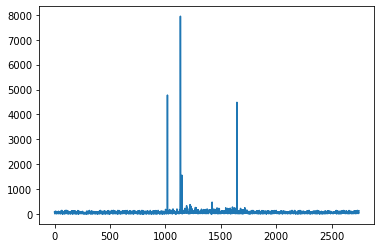

In [ ]:
#Checking for each review length and distribution of dataset
review_length = df.Review.str.len()
plt.plot(review_length);

In [ ]:
review_length.describe()

count    2748.000000
mean       71.528384
std       201.987266
min         7.000000
25%        32.000000
50%        55.000000
75%        87.000000
max      7944.000000
Name: Review, dtype: float64

In [ ]:
# Below function converts emojis to text

import re
import string

def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = re.sub(r'('+emot+')', "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()), text)
    return text

In [ ]:
# Below function removes non-english words

ascii = set(string.printable)   

def remove_non_ascii(text):
    return filter(lambda x: x in ascii, text)

In [ ]:
# Below function converts text to lower-case, removes square bracket, removes numbers and punctuation
import re
import string

def text_clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text
cleantext = lambda x: text_clean(x)

In [ ]:
# Add new column with cleaned text
df['Review_cleaned'] = pd.DataFrame(df.Review.apply(cleantext))
df

,Review,Sentiment,Review_cleaned
0,So there is no way for me to plug it in here i...,0,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",1,good case excellent value
2,Great for the jawbone.,1,great for the jawbone
3,Tied to charger for conversations lasting more...,0,tied to charger for conversations lasting more...
4,The mic is great.,1,the mic is great
...,...,...,...
2743,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
2744,Appetite instantly gone.,0,appetite instantly gone
2745,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
2746,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


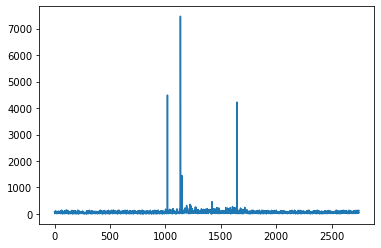

In [ ]:
#Checking for each review length and distribution of dataset
review_length_cleaned = df.Review_cleaned.str.len()
plt.plot(review_length_cleaned);

In [ ]:
review_length_cleaned.describe()

count    2748.000000
mean       68.736900
std       190.169963
min         2.000000
25%        31.000000
50%        53.000000
75%        84.000000
max      7468.000000
Name: Review_cleaned, dtype: float64

In [ ]:
#Import required NLP libraries
import nltk 
nltk.download('punkt') 

from nltk import sent_tokenize # this helps to split text into Sentences
from nltk import word_tokenize # this helps to split text into individual Words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Tokenize the text by sentences :
sentences = sent_tokenize(text)
#How many sentences are there? :
print (len(sentences))

2990


In [ ]:
#Tokenize the text with words :
words = word_tokenize(text)

#How many words are there? :
print (len(words))
print("\n")

#Print words :
print (words)

44275


['So', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'US', 'unless', 'I', 'go', 'by', 'a', 'converter', '.', '0', 'Good', 'case', ',', 'Excellent', 'value', '.', '1', 'Great', 'for', 'the', 'jawbone', '.', '1', 'Tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', '45', 'minutes.MAJOR', 'PROBLEMS', '!', '!', '0', 'The', 'mic', 'is', 'great', '.', '1', 'I', 'have', 'to', 'jiggle', 'the', 'plug', 'to', 'get', 'it', 'to', 'line', 'up', 'right', 'to', 'get', 'decent', 'volume', '.', '0', 'If', 'you', 'have', 'several', 'dozen', 'or', 'several', 'hundred', 'contacts', ',', 'then', 'imagine', 'the', 'fun', 'of', 'sending', 'each', 'of', 'them', 'one', 'by', 'one', '.', '0', 'If', 'you', 'are', 'Razr', 'owner', '...', 'you', 'must', 'have', 'this', '!', '1', 'Needless', 'to', 'say', ',', 'I', 'wasted', 'my', 'money', '.', '0', 'What', 'a', 'waste', 'of', 'money', 'and', 'time', '!', '.', '0', 'And', 'the', 'sound', 'quali

<FreqDist with 6106 samples and 44275 outcomes>
[('.', 2635), ('1', 1513), ('0', 1500), ('the', 1476), (',', 1306), ('and', 1106), ('I', 993), ('a', 848), ('is', 757), ('to', 660)]


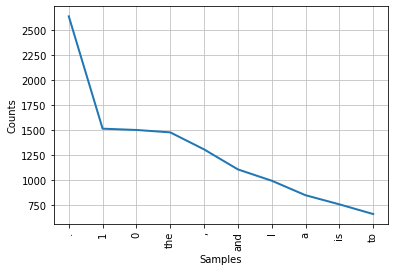

In [ ]:

# Import required libraries
from nltk.probability import FreqDist

# Find the frequency of the words
fdist = FreqDist(words)
# Printing the frequency
print(fdist)

# Find the 10 most common words 
fdist_10 = fdist.most_common(10)
print(fdist_10)

# Plot the graph for fdist :
fdist.plot(10)

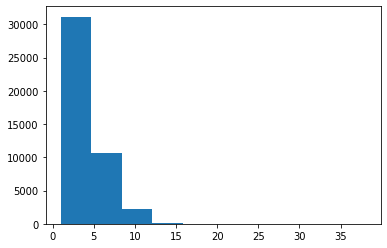

In [ ]:
word_lengths = [len(w) for w in words]
plt.hist(word_lengths);

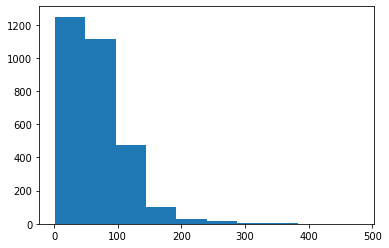

In [ ]:
sentence_lengths = [len(s) for s in sentences]
plt.hist(sentence_lengths);

In [ ]:
# Text Data Cleaning

words_no_punc = []

#Removing punctuation marks
for w in words:
    if w.isalpha():
        words_no_punc.append(w.lower())

#Print the words without punctuation marks :
print (words_no_punc)
print ("\n")

['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'i', 'go', 'by', 'a', 'converter', 'good', 'case', 'excellent', 'value', 'great', 'for', 'the', 'jawbone', 'tied', 'to', 'charger', 'for', 'conversations', 'lasting', 'more', 'than', 'problems', 'the', 'mic', 'is', 'great', 'i', 'have', 'to', 'jiggle', 'the', 'plug', 'to', 'get', 'it', 'to', 'line', 'up', 'right', 'to', 'get', 'decent', 'volume', 'if', 'you', 'have', 'several', 'dozen', 'or', 'several', 'hundred', 'contacts', 'then', 'imagine', 'the', 'fun', 'of', 'sending', 'each', 'of', 'them', 'one', 'by', 'one', 'if', 'you', 'are', 'razr', 'owner', 'you', 'must', 'have', 'this', 'needless', 'to', 'say', 'i', 'wasted', 'my', 'money', 'what', 'a', 'waste', 'of', 'money', 'and', 'time', 'and', 'the', 'sound', 'quality', 'is', 'great', 'he', 'was', 'very', 'impressed', 'when', 'going', 'from', 'the', 'original', 'battery', 'to', 'the', 'extended', 'battery', 'if', 'the', 'two'

In [ ]:
#Length :
print (len(words_no_punc))

#Frequency distribution :
fdist = FreqDist(words_no_punc)

# Displaying the top 10 common words
fdist.most_common(10)

34876


[('the', 1942),
 ('and', 1134),
 ('i', 1027),
 ('a', 886),
 ('it', 784),
 ('is', 761),
 ('to', 667),
 ('this', 642),
 ('of', 622),
 ('was', 594)]

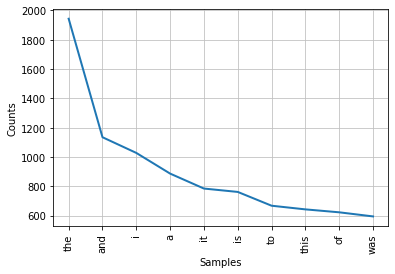

In [ ]:
#Plot the most common words on graph:
fdist.plot(10)

In [ ]:
#Removing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

#List of stopwords
stopwords = stopwords.words("english")
print(stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [ ]:
df['Review_cleaned'] = df['Review_cleaned'] .apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
df

,Review,Sentiment,Review_cleaned
0,So there is no way for me to plug it in here i...,0,way plug us unless go converter
1,"Good case, Excellent value.",1,good case excellent value
2,Great for the jawbone.,1,great jawbone
3,Tied to charger for conversations lasting more...,0,tied charger conversations lasting minutesmajo...
4,The mic is great.,1,mic great
...,...,...,...
2743,I think food should have flavor and texture an...,0,think food flavor texture lacking
2744,Appetite instantly gone.,0,appetite instantly gone
2745,Overall I was not impressed and would not go b...,0,overall impressed would go back
2746,"The whole experience was underwhelming, and I ...",0,whole experience underwhelming think well go n...


In [ ]:
#Empty list to store clean words :
clean_words = []

for w in words_no_punc:
    if w not in stopwords:
        clean_words.append(w)
        
print(clean_words)
print("\n")
print(len(clean_words))

['way', 'plug', 'us', 'unless', 'go', 'converter', 'good', 'case', 'excellent', 'value', 'great', 'jawbone', 'tied', 'charger', 'conversations', 'lasting', 'problems', 'mic', 'great', 'jiggle', 'plug', 'get', 'line', 'right', 'get', 'decent', 'volume', 'several', 'dozen', 'several', 'hundred', 'contacts', 'imagine', 'fun', 'sending', 'one', 'one', 'razr', 'owner', 'must', 'needless', 'say', 'wasted', 'money', 'waste', 'money', 'time', 'sound', 'quality', 'great', 'impressed', 'going', 'original', 'battery', 'extended', 'battery', 'two', 'seperated', 'mere', 'ft', 'started', 'notice', 'excessive', 'static', 'garbled', 'sound', 'headset', 'good', 'quality', 'though', 'design', 'odd', 'ear', 'clip', 'comfortable', 'highly', 'recommend', 'one', 'blue', 'tooth', 'phone', 'advise', 'everyone', 'fooled', 'far', 'good', 'works', 'great', 'clicks', 'place', 'way', 'makes', 'wonder', 'long', 'mechanism', 'would', 'last', 'went', 'motorola', 'website', 'followed', 'directions', 'could', 'get', 'p

In [ ]:
df['Review_cleaned'] = df['Review_cleaned'] .apply(lambda x: " ".join(x for x in x.split() if x in clean_words))
df

,Review,Sentiment,Review_cleaned
0,So there is no way for me to plug it in here i...,0,way plug us unless go converter
1,"Good case, Excellent value.",1,good case excellent value
2,Great for the jawbone.,1,great jawbone
3,Tied to charger for conversations lasting more...,0,tied charger conversations lasting problems
4,The mic is great.,1,mic great
...,...,...,...
2743,I think food should have flavor and texture an...,0,think food flavor texture lacking
2744,Appetite instantly gone.,0,appetite instantly gone
2745,Overall I was not impressed and would not go b...,0,overall impressed would go back
2746,"The whole experience was underwhelming, and I ...",0,whole experience underwhelming think well go n...


In [ ]:
# Stemming and lemmetizing for normakizing the text
from nltk.stem import PorterStemmer
st = PorterStemmer()

# Refresh clean_review column
df['Review_cleaned'] = df['Review_cleaned'].apply(lambda x: " ".join([st.stem(clean_words) for clean_words in x.split()]))
df

,Review,Sentiment,Review_cleaned
0,So there is no way for me to plug it in here i...,0,way plug us unless go convert
1,"Good case, Excellent value.",1,good case excel valu
2,Great for the jawbone.,1,great jawbon
3,Tied to charger for conversations lasting more...,0,tie charger convers last problem
4,The mic is great.,1,mic great
...,...,...,...
2743,I think food should have flavor and texture an...,0,think food flavor textur lack
2744,Appetite instantly gone.,0,appetit instantli gone
2745,Overall I was not impressed and would not go b...,0,overal impress would go back
2746,"The whole experience was underwhelming, and I ...",0,whole experi underwhelm think well go ninja su...


In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in clean_words])
print(lemmatized_output)

way plug u unless go converter good case excellent value great jawbone tied charger conversation lasting problem mic great jiggle plug get line right get decent volume several dozen several hundred contact imagine fun sending one one razr owner must needle say wasted money waste money time sound quality great impressed going original battery extended battery two seperated mere ft started notice excessive static garbled sound headset good quality though design odd ear clip comfortable highly recommend one blue tooth phone advise everyone fooled far good work great click place way make wonder long mechanism would last went motorola website followed direction could get pair bought use kindle fire absolutely loved commercial misleading yet run new battery two bar three day without charging bought mother problem battery great pocket pc phone combination owned phone month say best mobile phone think instruction provided helpful people couldnt hear talk pull earphone talk phone hold charge si

In [ ]:
df['Review_cleaned'] = df['Review_cleaned'] .apply(lambda x: " ".join(x for x in x.split() if x in lemmatized_output))
df

,Review,Sentiment,Review_cleaned
0,So there is no way for me to plug it in here i...,0,way plug us unless go convert
1,"Good case, Excellent value.",1,good case excel valu
2,Great for the jawbone.,1,great jawbon
3,Tied to charger for conversations lasting more...,0,tie charger convers last problem
4,The mic is great.,1,mic great
...,...,...,...
2743,I think food should have flavor and texture an...,0,think food flavor textur lack
2744,Appetite instantly gone.,0,appetit gone
2745,Overall I was not impressed and would not go b...,0,overal impress would go back
2746,"The whole experience was underwhelming, and I ...",0,whole experi underwhelm think well go ninja su...


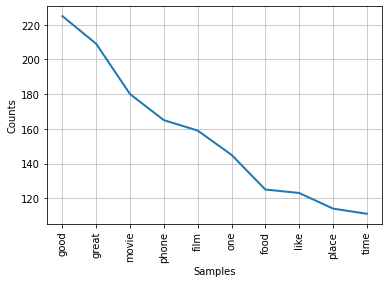

In [ ]:
#Frequency distribution :
fdist = FreqDist(clean_words)
fdist.most_common(10)
#Plot the most common words on grpah:
fdist.plot(10)

In [ ]:
# Split dataset into training and test sets
from sklearn.model_selection import train_test_split

X = df['Review_cleaned']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

#Rename the split datasets
train_reviews = X_train
train_sentiments = y_train

test_reviews = X_test
test_sentiments = y_test

In [ ]:
# Tokenize reviews
# Import TensorFlow functions and Tokenizer API
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#List format for train dataset
train_sentences = []
train_labels = [] 

for row in train_reviews:
    train_sentences.append(str(row))
for row in train_sentiments:
    train_labels.append(row)

#List format for test dataset
test_sentences = []
test_labels = []

for row in test_reviews:
    test_sentences.append(str(row))
for row in test_sentiments:
    test_labels.append(row)

In [ ]:
# Set parameters for vocabulary
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'

tokenizer = Tokenizer()

tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
vocab_size = len(word_index)+1
print(vocab_size)

3010


# **Padding process**

In [ ]:
# Pad train sentences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen = max_length, truncating = trunc_type)

In [ ]:
# Pad test sentences
test_sentences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sentences, maxlen = max_length)

In [ ]:
# Print padded test sentences lengths and characteristics
print("\nPadded train sequences:\n", train_padded)
print("\nPadded train shape:", train_padded.shape)
print("Train sequences data type:", type(test_sentences))
print("Padded Train sequences data type:", type(train_padded))


Padded train sequences:
 [[   0    0    0 ...   11  214  178]
 [   0    0    0 ...   91  197  179]
 [   0    0    0 ...    0    0  198]
 ...
 [   0    0    0 ...    0   53  113]
 [   0    0    0 ...   23 1011  311]
 [   0    0    0 ... 3008 3009  666]]

Padded train shape: (1923, 100)
Train sequences data type: <class 'list'>
Padded Train sequences data type: <class 'numpy.ndarray'>


In [ ]:
# Print single padded sentence
print("An example of a single padded sequence:\n\n", train_sentences[3])

An example of a single padded sequence:

 sit vehicl cradl belt headset lost signal


In [ ]:
# Check numbers of sentiment categories 
print('Number of sentiment categories', df.Sentiment.unique())

Number of sentiment categories [0 1]


In [ ]:
# Extract cleaned dataset
df.to_excel('cleaned_dataset_Vamshi.xlsx')

In [ ]:
# TensorFlow
import tensorflow as tf
# Keras API
from tensorflow import keras
# Build the model
from tensorflow.keras.models import Sequential
model = Sequential()
# Import the layers
from tensorflow.keras.layers import GRU, Dense, Embedding, Dropout
model.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
model.add(GRU(32,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile model and set loss function
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Print model summary table
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           48160     
                                                                 
 gru (GRU)                   (None, 32)                4800      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 52,993
Trainable params: 52,993
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Instantiate Numpy arrays for confirming stopping criteria
train_labels_final = np.array(train_labels)
test_labels_final = np.array(test_labels)

In [ ]:
# Import EarlyStopping function from Keras
from keras.callbacks import EarlyStopping
ESC = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3)

In [ ]:
#Training the model with stopping criteria
model_fit_ESC= model.fit(train_padded, train_labels_final,callbacks=[ESC])

61/61 [==============================] - 8s 84ms/step - loss: 0.6886 - accuracy: 0.5736


In [ ]:
# Model evaluation with stopping criteria
model.evaluate(test_padded, test_labels_final)

26/26 [==============================] - 1s 11ms/step - loss: 0.6786 - accuracy: 0.6715


[0.678578794002533, 0.671515166759491]

In [ ]:
#Training the model with epochs
model_fit_epoch= model.fit(train_padded, train_labels_final,epochs=15,validation_data = (test_padded, test_labels_final))

Epoch 1/15
61/61 [==============================] - 5s 90ms/step - loss: 0.5952 - accuracy: 0.7884 - val_loss: 0.5236 - val_accuracy: 0.7648
Epoch 2/15
61/61 [==============================] - 5s 88ms/step - loss: 0.3571 - accuracy: 0.8742 - val_loss: 0.4510 - val_accuracy: 0.7830
Epoch 3/15
61/61 [==============================] - 5s 90ms/step - loss: 0.2258 - accuracy: 0.9215 - val_loss: 0.4925 - val_accuracy: 0.7806
Epoch 4/15
61/61 [==============================] - 5s 89ms/step - loss: 0.1773 - accuracy: 0.9340 - val_loss: 0.5453 - val_accuracy: 0.7806
Epoch 5/15
61/61 [==============================] - 5s 88ms/step - loss: 0.1307 - accuracy: 0.9516 - val_loss: 0.5493 - val_accuracy: 0.7976
Epoch 6/15
61/61 [==============================] - 5s 89ms/step - loss: 0.1109 - accuracy: 0.9548 - val_loss: 0.5749 - val_accuracy: 0.7794
Epoch 7/15
61/61 [==============================] - 5s 87ms/step - loss: 0.0907 - accuracy: 0.9672 - val_loss: 0.6302 - val_accuracy: 0.7855
Epoch 8/15
61

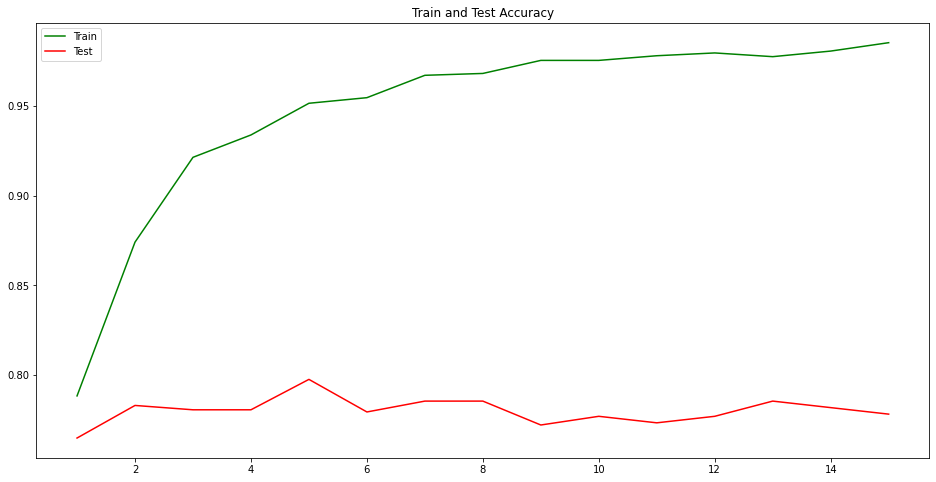

In [ ]:
# Visualizing accuracy of the model

acc = model_fit_epoch.history['accuracy']
val_acc = model_fit_epoch.history['val_accuracy']

epochs=range(1,len(acc)+1)

plt.figure(figsize=(16,8))
plt.plot(epochs, acc, 'g',label='Train')
plt.plot(epochs, val_acc, 'r',label='Test')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.plot();

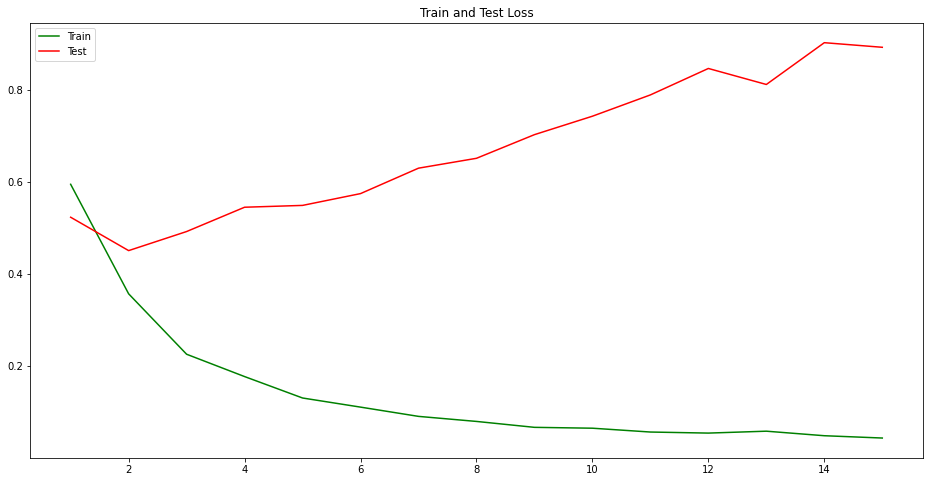

In [ ]:
# Visualizing loss of the model

loss = model_fit_epoch.history['loss']
val_loss = model_fit_epoch.history['val_loss']

epochs=range(1,len(acc)+1)

plt.figure(figsize=(16,8))
plt.plot(epochs, loss, 'g',label='Train')
plt.plot(epochs, val_loss, 'r',label='Test')
plt.title('Train and Test Loss')
plt.legend(loc='best')
plt.plot();

In [ ]:
#Final model with epoch of 6

model_fit_epoch_6= model.fit(train_padded, train_labels_final,epochs=6,validation_data = (test_padded, test_labels_final))

Epoch 1/6
61/61 [==============================] - 6s 91ms/step - loss: 0.0443 - accuracy: 0.9828 - val_loss: 0.9456 - val_accuracy: 0.7758
Epoch 2/6
61/61 [==============================] - 5s 87ms/step - loss: 0.0415 - accuracy: 0.9865 - val_loss: 0.9395 - val_accuracy: 0.7806
Epoch 3/6
61/61 [==============================] - 5s 87ms/step - loss: 0.0379 - accuracy: 0.9839 - val_loss: 1.0134 - val_accuracy: 0.7709
Epoch 4/6
61/61 [==============================] - 5s 87ms/step - loss: 0.0379 - accuracy: 0.9849 - val_loss: 1.0688 - val_accuracy: 0.7721
Epoch 5/6
61/61 [==============================] - 5s 87ms/step - loss: 0.0345 - accuracy: 0.9891 - val_loss: 1.0757 - val_accuracy: 0.7721
Epoch 6/6
61/61 [==============================] - 5s 90ms/step - loss: 0.0345 - accuracy: 0.9870 - val_loss: 1.0907 - val_accuracy: 0.7733
